# Jupyter часть

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## 1. Подготовка данных

- ### Скачивание датасета и загрузка как pandas.DataFrame

In [129]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (891, 12)
test shape: (418, 11)


In [130]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [131]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


- ### Конкатенация в один DataFrame

In [132]:
train_idx = train.set_index('PassengerId')
test_idx = test.set_index('PassengerId')

combined = pd.concat([train_idx, test_idx], axis=0, sort=False)
combined.index.name = 'PassengerId'

print('combined shape:', combined.shape)
combined.reset_index().head(5)

combined shape: (1309, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- #### Приведение столбцов к категориальному типу

In [133]:
# Приведение типов
df = combined.copy()

df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   category
 4   Age       1046 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Ticket    1309 non-null   object  
 8   Fare      1308 non-null   float64 
 9   Cabin     295 non-null    category
 10  Embarked  1307 non-null   category
dtypes: category(5), float64(2), int64(2), object(2)
memory usage: 85.3+ KB


## 2. Анализ таблицы
- ### Вывод базовой статистики

In [134]:
display(df.describe(include='all'))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,1309.0,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,2.0,3.0,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,0.0,3.0,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,549.0,709.0,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,NaN,NaN,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,NaN,NaN,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,NaN,NaN,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


- ### Самый многочисленный класс

In [135]:
pclass_counts = df['Pclass'].value_counts(dropna=True)
pclass_counts

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

Вывод: самый многочисленный класс - третий 

- ### Группировка по двум уровням: Pclass и Sex, по среднему возрасту. Выяснение кто из возможных комбинаций самый юный/взорслый, и разница между этими значениями

In [136]:
age_group = df.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean()
age_group.head(7)

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [137]:
youngest_combo = age_group.idxmin()
oldest_combo = age_group.idxmax()
youngest_val = age_group.min()
oldest_val = age_group.max()
youngest_combo, youngest_val, oldest_combo, oldest_val, oldest_val - youngest_val

((np.int64(3), 'female'),
 np.float64(22.185328947368422),
 (np.int64(1), 'male'),
 np.float64(41.02927152317881),
 np.float64(18.843942575810384))

Вывод: Самый юный - женщина из 3 класса, самый взрослый - мужчина из 1. <br>
значения отличаются на 18.8439

- ### Отбор только выживших пассажиров с фамилией, начинающейся на 'K', и сортировка по убыванию Fare. Поиск заплативших больше/меньше всех.

In [138]:
df_names = df.copy()
df_names['Surname'] = df_names['Name'].str.split(',').str[0]

survived_k = df_names[(df_names['Survived'] == 1) & (df_names['Surname'].str.startswith('K', na=False))]

survived_k_sorted = survived_k.sort_values(by='Fare', ascending=False)
survived_k_sorted[['Surname', 'Name', 'Fare', 'Pclass', 'Sex']].head(5)

,Surname,Name,Fare,Pclass,Sex
PassengerId,,,,,
622,Kimball,"Kimball, Mr. Edwin Nelson Jr",52.5542,1,male
458,Kenyon,"Kenyon, Mrs. Frederick R (Marion)",51.8625,1,female
317,Kantor,"Kantor, Mrs. Sinai (Miriam Sternin)",26.0000,2,female
185,Kink-Heilmann,"Kink-Heilmann, Miss. Luise Gretchen",22.0250,3,female
707,Kelly,"Kelly, Mrs. Florence ""Fannie""",13.5000,2,female


In [139]:
survived_k_sorted[['Surname', 'Name', 'Fare', 'Pclass', 'Sex']].tail(5)

,Surname,Name,Fare,Pclass,Sex
PassengerId,,,,,
707,Kelly,"Kelly, Mrs. Florence ""Fannie""",13.5000,2,female
692,Karun,"Karun, Miss. Manca",13.4167,3,female
304,Keane,"Keane, Miss. Nora A",12.3500,2,female
301,Kelly,"Kelly, Miss. Anna Katherine ""Annie Kate""",7.7500,3,female
574,Kelly,"Kelly, Miss. Mary",7.7500,3,female


Вывод: Больше всего заплатил Kimball, Mr. Edwin Nelson Jr, меньше всего заплатили Kelly, Miss. Mary и Kelly, Miss. Anna Katherine "Annie Kate"

- ### Какое максимальное количество родных было с выжившим пассажиром?

In [140]:
df_rel = df.copy()
df_rel['FamilySize'] = df_rel['SibSp'] + df_rel['Parch']
max_family_survivor = df_rel[df_rel['Survived'] == 1]['FamilySize'].max()
max_family_passengers = df_rel[df_rel['FamilySize'] == max_family_survivor]
print(max_family_passengers[['Name', 'FamilySize']])

                                                          Name  FamilySize
PassengerId                                                               
14                                 Andersson, Mr. Anders Johan           6
26           Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...           6
69                             Andersson, Miss. Erna Alexandra           6
120                          Andersson, Miss. Ellis Anna Maria           6
183                      Asplund, Master. Clarence Gustaf Hugo           6
234                             Asplund, Miss. Lillian Gertrud           6
262                          Asplund, Master. Edvin Rojj Felix           6
542                       Andersson, Miss. Ingeborg Constanzia           6
543                          Andersson, Miss. Sigrid Elisabeth           6
611          Andersson, Mrs. Anders Johan (Alfrida Konstant...           6
814                         Andersson, Miss. Ebba Iris Alfrida           6
851                    An

Вывод: Среди выживших людей максимальное количество родственников, с которыми они находились на борту - 6.

## 3. Визуализация (10 графиков)

Scatter plot (интерактивный): стоимость билета в зависимости от возраста, цвет - класс

In [141]:
fig = px.scatter(df.reset_index(), x='Age', y='Fare', color='Pclass', hover_data=['Name','Survived','Sex','Ticket'],
                 title='Interactive Age vs Fare (by Pclass)', height=500)
fig.update_traces(marker={'size':8, 'opacity':0.7})
fig

Linear plot: шансы выживания по возрастным группам для каждого класса

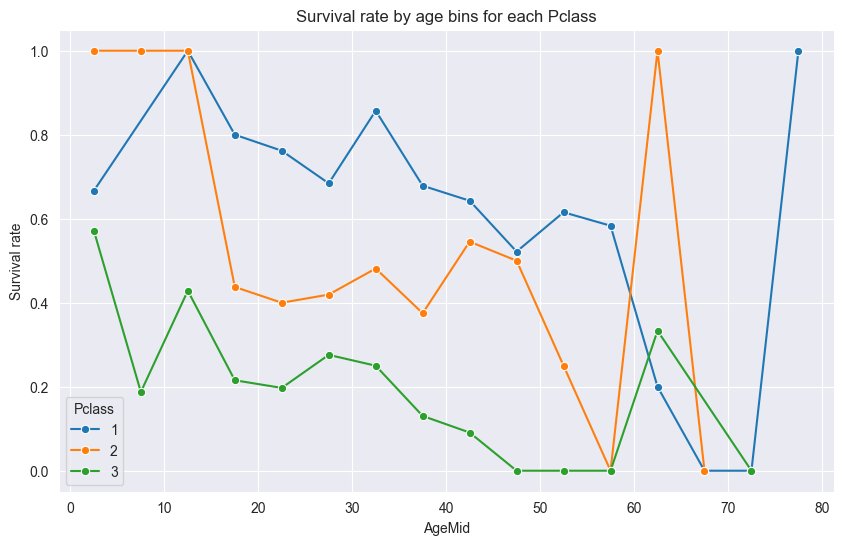

In [152]:
df_line = df.reset_index().copy()
df_line = df_line[~df_line['Age'].isna() & ~df_line['Survived'].isna()]
age_bins = np.arange(0, 85, 5)
df_line['AgeBin'] = pd.cut(df_line['Age'], bins=age_bins)
survival_by_age_pclass = df_line.groupby(['AgeBin','Pclass'], observed=True)['Survived'].apply(lambda s: (s.astype(float)==1).mean()).reset_index()
survival_by_age_pclass['AgeMid'] = survival_by_age_pclass['AgeBin'].apply(lambda b: b.left + 2.5)

plt.figure(figsize=(10,6))
sns.lineplot(data=survival_by_age_pclass, x='AgeMid', y='Survived', hue='Pclass', marker='o')
plt.title('Survival rate by age bins for each Pclass')
plt.ylabel('Survival rate')
plt.show()

Histogram (интерактивный): распределение возраста

In [143]:
fig = px.histogram(df.reset_index(), x='Age', nbins=30, title='Age distribution by Pclass', marginal='box')
fig

Bar chart: количество пассажиров в каждом классе

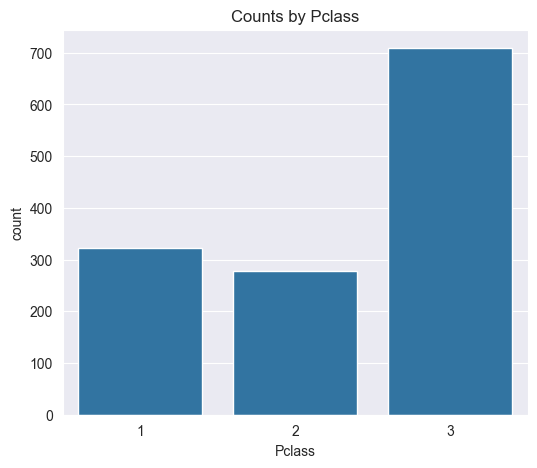

In [144]:
plt.figure(figsize=(6,5))
sns.countplot(data=df.reset_index(), x='Pclass', order=sorted(df['Pclass'].dropna().unique()))
plt.title('Counts by Pclass')
plt.show()

Horizontal bar chart (интерактивный): топ 10 фамилий по количеству пассажиров

In [145]:
top_surnames = df_names['Surname'].value_counts().nlargest(10).reset_index()
top_surnames.columns = ['Surname','Count']
fig = px.bar(top_surnames, x='Count', y='Surname', orientation='h', title='Top 10 surnames by passenger count')
fig

Pie chart (интерактивный): доля выживших/погибших

In [146]:
surv_counts = df['Survived'].value_counts(dropna=True).rename_axis('Survived').reset_index(name='Count')
surv_counts['Survived'] = surv_counts['Survived'].astype(str)
fig = px.pie(surv_counts, names='Survived', values='Count', title='Survived distribution (known entries)', hole=0.3)
fig

Box chart: распределение Fare внутри классов

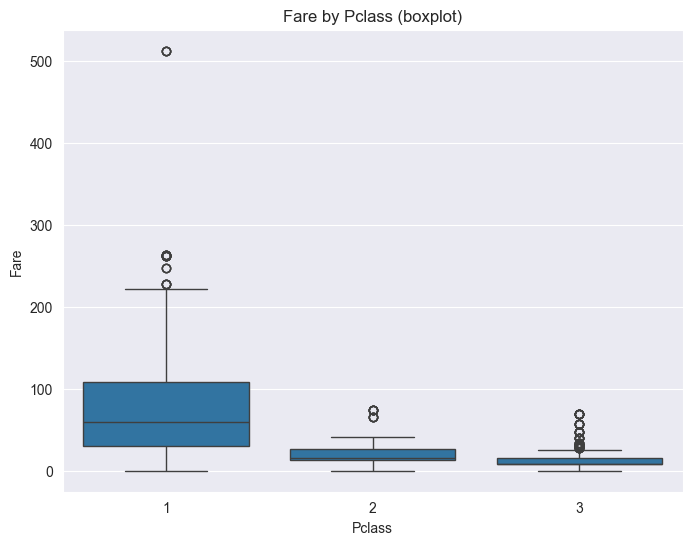

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df.reset_index(), x='Pclass', y='Fare')
plt.title('Fare by Pclass (boxplot)')
plt.show()

Box chart - распределение возраста внутри классов

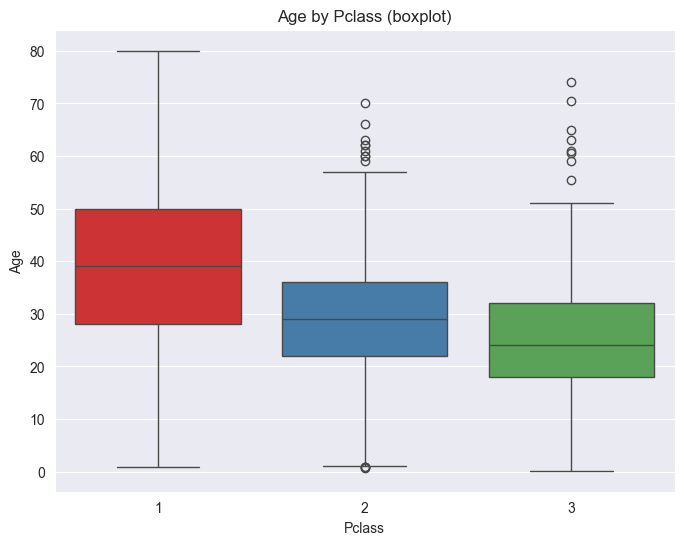

In [148]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Pclass', palette='Set1', legend=False)
plt.title('Age by Pclass (boxplot)')
plt.show()

Sunburst chart (интерактивный): Pclass -> Sex -> Survived

In [149]:
sun_df = df.reset_index().dropna(subset=['Pclass','Sex'])
sun_df['SurvivedStr'] = sun_df['Survived'].astype(str)
fig = px.sunburst(sun_df, path=['Pclass','Sex','SurvivedStr'], title='Sunburst: Pclass -> Sex -> Survived')
fig

3D scatter (интерактивный): Возраст (x), Стоимость билета (y), Размер семьи (z), цвет — Выживание

In [150]:
plot_df = df_rel.reset_index().copy()
plot_df = plot_df[~plot_df['Age'].isna() & ~plot_df['Fare'].isna()]
plot_df['SurvivedStr'] = plot_df['Survived'].astype(str)

fig = px.scatter_3d(plot_df, x='Age', y='Fare', z='FamilySize', color='SurvivedStr', hover_data=['Name','Pclass','Sex'],
                    title='3D scatter: Age, Fare, FamilySize (color by Survived)')
fig.update_traces(marker=dict(size=4))
fig

Sankey Diagram: показывает связь класса, пола и выживания

In [151]:
# Построим Sankey: Pclass -> Sex -> Survived
sank_df = df.reset_index().dropna(subset=['Pclass','Sex','Survived'])
sank_df['SurvivedStr'] = sank_df['Survived'].astype(str)

labels = []
pclasses = sorted(sank_df['Pclass'].unique())
sexes = sorted(sank_df['Sex'].unique())
survs = sorted(sank_df['SurvivedStr'].unique())

labels = [f'Class {c}' for c in pclasses] + [str(s) for s in sexes] + [f'Surv_{s}' for s in survs]

def label_index(l):
    return labels.index(l)

source = []
target = []
value = []

# Class -> Sex
for c in pclasses:
    for s in sexes:
        cnt = len(sank_df[(sank_df['Pclass']==c) & (sank_df['Sex']==s)])
        if cnt>0:
            source.append(label_index(f'Class {c}'))
            target.append(label_index(str(s)))
            value.append(cnt)

# Sex -> Survived
for s in sexes:
    for sv in survs:
        cnt = len(sank_df[(sank_df['Sex']==s) & (sank_df['SurvivedStr']==sv)])
        if cnt>0:
            source.append(label_index(str(s)))
            target.append(label_index(f'Surv_{sv}'))
            value.append(cnt)

sank_fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = 'black', width = 0.5),
      label = labels,
    ),
    link = dict(
      source = source,
      target = target,
      value =  value
  ))])
sank_fig.update_layout(title_text='Sankey: Pclass -> Sex -> Survived', font_size=10)
sank_fig